MNIST a

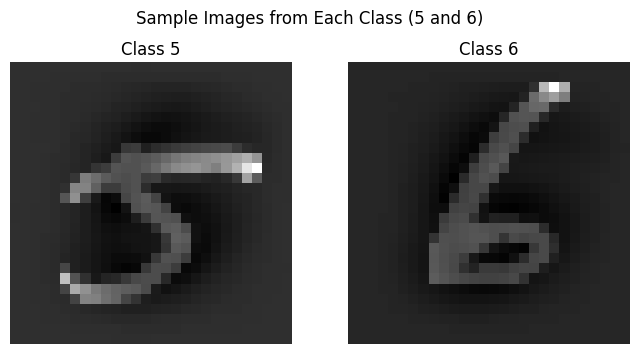

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



Logistic Regression with Regularization
Overall Accuracy: 0.9803
Per-Class Accuracy:
Class 5: 0.9818
Class 6: 0.9789

Logistic Regression without Regularization
Overall Accuracy: 0.9708
Per-Class Accuracy:
Class 5: 0.9715
Class 6: 0.9702


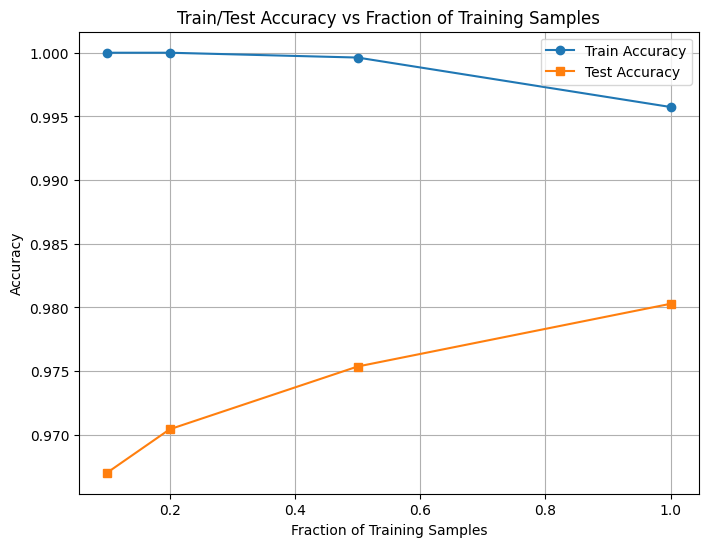

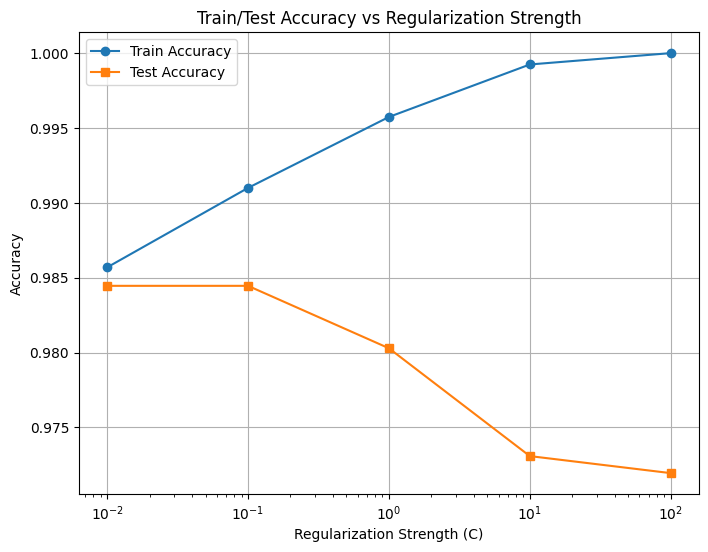

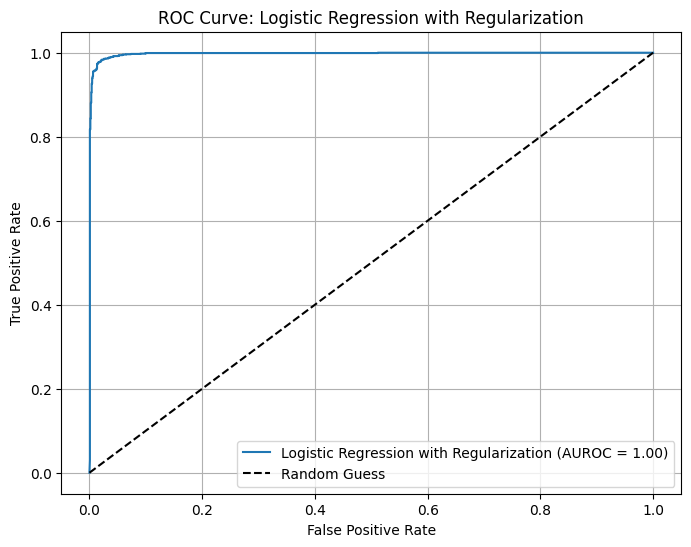

Logistic Regression with Regularization - AUROC: 0.9973


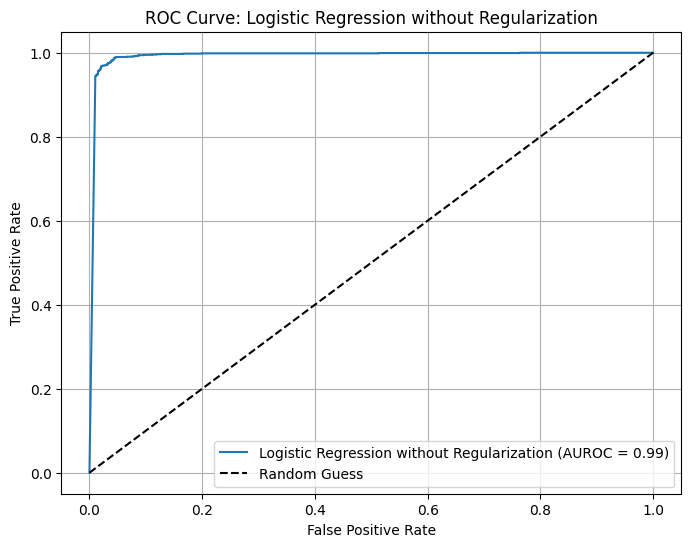

Logistic Regression without Regularization - AUROC: 0.9920
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Final Hyperparameter Values (after Hyperparameter Tuning):
Best Regularization Strength (C): 0.01
Best Cross-Validation Accuracy: 0.9807


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Load the MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist.data, mnist.target.astype(int)  # x: Images, y: Labels (as integers)

# Filter for digits 5 and 6 only
filter_5_6 = (y == 5) | (y == 6)
x, y = x[filter_5_6], y[filter_5_6]

# Convert labels: 5 -> 0, 6 -> 1
y = (y == 6).astype(int)

# Normalize the data (pixel values between 0 and 1)
x = x / 255.0

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 2. Display Sample Images
def display_sample_images():
    plt.figure(figsize=(8, 4))
    for i, digit in enumerate([0, 1]):  # Loop through the classes: 5 (label 0) and 6 (label 1)
        index = np.where(y_train == digit)[0][0]  # Find the first occurrence of each class
        plt.subplot(1, 2, i + 1)
        plt.imshow(x_train[index].reshape(28, 28), cmap='gray')
        plt.title(f"Class {5 + digit}")
        plt.axis('off')
    plt.suptitle("Sample Images from Each Class (5 and 6)")
    plt.show()

display_sample_images()

# 3. Logistic Regression Implementation

# Logistic Regression with Regularization
def logistic_regression_with_regularization(c=1.0, max_iter=100):
    model = LogisticRegression(C=c, penalty='l2', max_iter=max_iter, solver='lbfgs')
    model.fit(x_train, y_train)
    return model

# Logistic Regression without Regularization
def logistic_regression_without_regularization(max_iter=100):
    model = LogisticRegression(C=1e10, penalty=None, max_iter=max_iter, solver='lbfgs')
    model.fit(x_train, y_train)
    return model

# 4. Train Logistic Regression Models
max_iter = 3000
model_with_reg = logistic_regression_with_regularization(c=1.0, max_iter=max_iter)
model_without_reg = logistic_regression_without_regularization(max_iter=max_iter)

# Evaluate Models
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    overall_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    return overall_accuracy, per_class_accuracy, conf_matrix

# Evaluation for Logistic Regression with Regularization
overall_acc_with_reg, per_class_acc_with_reg, conf_matrix_with_reg = evaluate_model(model_with_reg, x_test, y_test)

# Evaluation for Logistic Regression without Regularization
overall_acc_without_reg, per_class_acc_without_reg, conf_matrix_without_reg = evaluate_model(model_without_reg, x_test, y_test)

# Print Results
print("\nLogistic Regression with Regularization")
print(f"Overall Accuracy: {overall_acc_with_reg:.4f}")
print("Per-Class Accuracy:")
for i, acc in enumerate(per_class_acc_with_reg):
    print(f"Class {5 + i}: {acc:.4f}")

print("\nLogistic Regression without Regularization")
print(f"Overall Accuracy: {overall_acc_without_reg:.4f}")
print("Per-Class Accuracy:")
for i, acc in enumerate(per_class_acc_without_reg):
    print(f"Class {5 + i}: {acc:.4f}")

# 5. Train/Test Accuracy vs. Number of Samples
sample_fractions = [0.1, 0.2, 0.5, 1.0]  # Use different fractions of the training data
train_accuracies = []
test_accuracies = []

for frac in sample_fractions:
    # Select a subset of the training data
    n_samples = int(len(x_train) * frac)
    x_train_subset = x_train[:n_samples]
    y_train_subset = y_train[:n_samples]

    # Train the logistic regression model with the subset
    model = LogisticRegression(C=1.0, penalty='l2', max_iter=100, solver='lbfgs')
    model.fit(x_train_subset, y_train_subset)

    # Compute accuracies
    train_accuracies.append(model.score(x_train_subset, y_train_subset))
    test_accuracies.append(model.score(x_test, y_test))

# Plot Train/Test Accuracy vs. Number of Samples
plt.figure(figsize=(8, 6))
plt.plot(sample_fractions, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(sample_fractions, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel("Fraction of Training Samples")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy vs Fraction of Training Samples")
plt.legend()
plt.grid()
plt.show()

# 6. Hyperparameter Tuning (Regularization Strength)
c_values = [0.01, 0.1, 1.0, 10.0, 100.0]
train_accuracies = []
test_accuracies = []

for c in c_values:
    model = logistic_regression_with_regularization(c=c, max_iter=max_iter)
    train_accuracies.append(model.score(x_train, y_train))
    test_accuracies.append(model.score(x_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(c_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(c_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xscale('log')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy vs Regularization Strength")
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# 7. Plot ROC and Print AUROC
def plot_roc_curve_and_auroc(model, x_test, y_test, model_name):
    # Predict probabilities for the positive class (digit 6, labeled as 1)
    y_pred_prob = model.predict_proba(x_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auroc = roc_auc_score(y_test, y_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUROC = {auroc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Diagonal line for random guess
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

    # Print AUROC
    print(f"{model_name} - AUROC: {auroc:.4f}")

# Plot ROC for Logistic Regression with Regularization
plot_roc_curve_and_auroc(model_with_reg, x_test, y_test, "Logistic Regression with Regularization")

# Plot ROC for Logistic Regression without Regularization
plot_roc_curve_and_auroc(model_without_reg, x_test, y_test, "Logistic Regression without Regularization")


# Best Regularization Strength using GridSearchCV
param_grid = {'C': c_values}
grid_search = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs', max_iter=max_iter),
                           param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)
best_c = grid_search.best_params_['C']
best_acc = grid_search.best_score_

print("\nFinal Hyperparameter Values (after Hyperparameter Tuning):")
print(f"Best Regularization Strength (C): {best_c}")
print(f"Best Cross-Validation Accuracy: {best_acc:.4f}")
